#Lectura y procesamiento de los resultados de los mejores modelos ESN

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de ESN. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsESN1S = pd.read_excel('grilla_ESN_NARX_1STEPS.xlsx', header=0)
summaryModelsESN2S = pd.read_excel('grilla_ESN_NARX_2STEPS.xlsx', header=0)
summaryModelsESN3S = pd.read_excel('grilla_ESN_NARX_3STEPS.xlsx', header=0)
summaryModelsESN4S = pd.read_excel('grilla_ESN_NARX_4STEPS.xlsx', header=0)

grilla_ESN_NARX_AQP = pd.concat([summaryModelsESN1S, summaryModelsESN2S], ignore_index=True)
grilla_ESN_NARX_AQP = pd.concat([grilla_ESN_NARX_AQP, summaryModelsESN3S], ignore_index=True)
grilla_ESN_NARX_AQP = pd.concat([grilla_ESN_NARX_AQP, summaryModelsESN4S], ignore_index=True)

grilla_ESN_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    288 non-null    float64
 1   delayedSteps            288 non-null    int64  
 2   nameModel               288 non-null    object 
 3   nameHistory             288 non-null    object 
 4   nameConfiguration       288 non-null    object 
 5   timeTrain (in seconds)  288 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 13.6+ KB


##La cantidad de modelos generados para el ESN NARX de DDFO fue de 288

In [4]:
rslt_df = grilla_ESN_NARX_AQP.sort_values('MAPE')
total = grilla_ESN_NARX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_ESN_NARX_AQP.describe()

Tiempo total: 38889.979999999996


MAPE  delayedSteps  timeTrain (in seconds)
count  288.000000     288.00000              288.000000
mean    91.870135       2.50000              135.034653
std     18.217174       1.11998                7.039381
min     17.952819       1.00000               66.380000
25%     96.626027       1.75000              132.277500
50%     99.627586       2.50000              133.965000
75%     99.666251       3.25000              137.487500
max    100.376258       4.00000              155.980000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 38889, lo que equivale a 10 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
277  17.952819  ...                  145.97
61   18.164112  ...                  135.27
43   18.389339  ...                  134.00
133  18.431232  ...                  140.75
115  18.701424  ...                  134.23
276  18.723885  ...                  146.53
259  19.019815  ...                  138.16
60   19.129355  ...                  135.92
187  20.622585  ...                  135.45
258  22.155286  ...                  136.19
42   22.545598  ...                  130.81
241  48.066119  ...                  134.81
211  51.591107  ...                  144.11
169  51.720063  ...                  134.70
168  53.993665  ...                  134.71
240  54.314708  ...                  136.26
283  54.375591  ...                  146.48
96   55.153380  ...                  133.25
282  57.909766  ...                  146.73
210  58.034685  ...                  145.07
139  59.435215  ...                  146.49
138  61.121260  ...                  141.02
67   63.068036  ...                  137.04
66   63.393739  ...                  136.26
265  66.280882  ...                  137.42
121  66.841201  ...                  135.75
264  68.032045  ...                  136.94
247  68.392076  ...                  134.76
193  68.648546  ...                  134.44
120  73.412220  ...                  133.80
150  73.423709  ...                  132.77
7    74.605147  ...                  132.35
49   74.737211  ...                  132.39
223  74.961930  ...                  134.32
192  75.029170  ...                  134.95
222  75.242383  ...                  134.49
151  75.375528  ...                  139.24
48   75.490303  ...                  133.24
79   76.180682  ...                  133.99
6    76.482719  ...                  132.04
175  77.078622  ...                  136.54
103  77.185010  ...                  133.84
85   77.454529  ...                  133.70
102  77.769072  ...                  135.31
246  78.340388  ...                  134.78

[45 rows x 6 columns]

In [16]:
rslt_df.iloc[1,:]

MAPE                                                                18.1641
delayedSteps                                                              1
nameModel                 results/ESN_113_1_256_sigmoid_relu_mean_absolu...
nameHistory               results/ESN_113_1_256_sigmoid_relu_mean_absolu...
nameConfiguration         results/ESN_113_1_256_sigmoid_relu_mean_absolu...
timeTrain (in seconds)                                               135.27
Name: 61, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAPE de 18.1, pero que tiene pocos retardos, especificamente 1 retardo.

In [17]:
bestModel = rslt_df.iloc[1,:]
print(bestModel)

MAPE                                                                18.1641
delayedSteps                                                              1
nameModel                 results/ESN_113_1_256_sigmoid_relu_mean_absolu...
nameHistory               results/ESN_113_1_256_sigmoid_relu_mean_absolu...
nameConfiguration         results/ESN_113_1_256_sigmoid_relu_mean_absolu...
timeTrain (in seconds)                                               135.27
Name: 61, dtype: object


In [18]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/ESN_113_1_256_sigmoid_relu_mean_absolute_error_1S_history.npy
results/ESN_113_1_256_sigmoid_relu_mean_absolute_error_1S_config.npy
results/ESN_113_1_256_sigmoid_relu_mean_absolute_error_1S.h5


In [19]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

ESN_113_1_256_sigmoid_relu_mean_absolute_error_1S_history.npy
ESN_113_1_256_sigmoid_relu_mean_absolute_error_1S_config.npy
ESN_113_1_256_sigmoid_relu_mean_absolute_error_1S.h5


In [11]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 7.9MB/s 


In [12]:
import tensorflow_addons as tfa

In [20]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
#print(saved_model.layers[2].get_config())

{'loss': [300.76251220703125, 300.57012939453125, 300.32208251953125, 300.0670166015625, 299.8086242675781, 299.5487365722656, 299.28759765625, 299.02569580078125, 298.7636413574219, 298.5012512207031, 298.2388916015625, 297.9764404296875, 297.7142333984375, 297.4517822265625, 297.1896667480469, 296.9276428222656, 296.6656799316406, 296.40399169921875, 296.1422119140625, 295.8808288574219, 295.6195373535156, 295.3583984375, 295.09735107421875, 294.8364562988281, 294.5755920410156, 294.3149719238281, 294.0544738769531, 293.7938232421875, 293.5335693359375, 293.2733154296875, 293.01300048828125, 292.7528381347656, 292.49285888671875, 292.2327880859375, 291.97296142578125, 291.7130126953125, 291.4531555175781, 291.1935729980469, 290.9338684082031, 290.6741638183594, 290.4146728515625, 290.1550598144531, 289.8956298828125, 289.63623046875, 289.3769226074219, 289.11749267578125, 288.8583679199219, 288.5989990234375, 288.3398132324219, 288.080810546875, 287.82159423828125, 287.5626220703125,

In [21]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/trainDF_std.csv', header=0)
  testDFScaled = pd.read_csv('data/testDF_std.csv', header=0)
  trainDF = pd.read_csv('data/trainDF.csv', header=0)
  testDF = pd.read_csv('data/testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


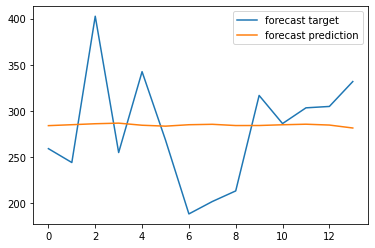

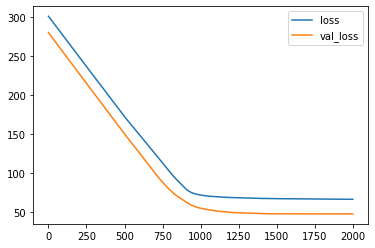

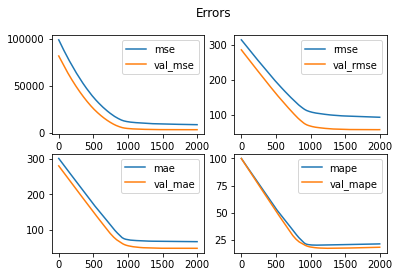

In [22]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)

##Generar data para NARMAX

In [23]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 12):
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      xAux = xAux.reshape(1,xAux.shape[0],xAux.shape[1])
      prediction = float(saved_model.predict(xAux))
      error = mape(salidaAux, prediction)
      dataNarmax.iloc[indexTarget, columnTarget+1] = error
      dataNarmaxScaled.iloc[indexTarget, columnTarget+1] = error
    indexAux = indexAux + 1
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled

In [24]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 1, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 1, saved_model)

In [25]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()

dataTrainNarmaxScaled[['error']] = std_scaler.fit_transform(dataTrainNarmaxScaled[['error']])
dataTestNarmaxScaled[['error']] = std_scaler.fit_transform(dataTestNarmaxScaled[['error']])

In [26]:
dataTrainNarmax.to_csv('dataTrainNarmaxESN.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledESN.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxESN.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledESN.csv', index = False)

In [27]:
dataTrainNarmax.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)       error
1                 1.0              5.0                224.675   31.918413
2                 1.0              6.0                129.412  121.536153
3                 2.0              2.0                317.120    9.352602
4                 2.0              3.0                210.517   28.881416
5                 2.0              4.0                207.364   33.330605
6                 2.0              5.0                263.043    2.934824
7                 2.0              6.0                248.958    2.693842
8                 3.0              2.0                344.291   21.750184
9                 3.0              3.0                248.428    9.973054
10                3.0              4.0                281.420    2.004762

In [ ]:
dataTestNarmax.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
27       1.0                  148.0       0.092022  0.124263
28       1.0                  149.0       0.092022  0.125083
29       1.0                  150.0       0.092022  0.146438
30       1.0                  151.0       0.092022  0.159347
31       1.0                  152.0       0.092022  0.167372
32       1.0                  153.0       0.398325  0.151603
33       1.0                  154.0       0.428488  0.165231
34       1.0                  155.0       0.520786  0.231157
35       1.0                  156.0       0.184045  0.182286
36       1.0                  157.0       0.460112  0.056609
37       1.0                  158.0       0.552134  0.113120
38       1.0                  159.0       0.368089  0.083413
39       1.0                  160.0       0.368089  0.073371
40       1.0                  161.0       0.276067  0.143370
41       1.0                  162.0       0.184045  0.199275
42       1.0                  163.0       0.184045  0.167963
43       1.0                  164.0       0.184045  0.130335
44       1.0                  165.0       0.092022  0.189655
45       1.0                  166.0       0.460112  0.181028
46       1.0                  167.0       1.104268  0.830410
47       1.0                  168.0       0.736179  0.469153
48       1.0                  169.0       0.184045  0.085518
49       1.0                  170.0       0.405162  0.129587
50       1.0                  171.0       0.438234  0.161595
51       1.0                  172.0       0.399484  0.150445
52       1.0                  173.0       0.409662  0.177855
53       1.0                  174.0       0.393647  0.161578
54       1.0                  175.0       0.393286  0.161241
55       1.0                  176.0       0.092022  0.145117
56       1.0                  177.0       0.092022  0.157447
57       1.0                  178.0       1.104268  0.850927
58       1.0                  179.0       1.840447  1.536916
59       1.0                  180.0       2.024491  1.696264
60       1.0                  181.0       0.920223  0.555187
61       1.0                  182.0       0.552134  0.184512
62       1.0                  183.0       0.368089  0.023949
63       1.0                  184.0       0.184045  0.194259
64       1.0                  185.0       0.092022  0.273291
65       1.0                  186.0       0.092022  0.255635
66       1.0                  187.0       0.092022  0.209214
67       1.0                  188.0       0.092022  0.176804
68       1.0                  189.0       0.092022  0.160576
69       1.0                  190.0       0.092022  0.174498
70       1.0                  191.0       0.276067  0.019191
71       1.0                  192.0       0.276067  0.019093
99       2.0                  148.0       0.460112  0.198199
100      2.0                  149.0       0.368089  0.091684
101      2.0                  150.0       0.552134  0.246752
102      2.0                  151.0       1.748424  1.407642
103      2.0                  152.0       2.668648  2.298495

In [ ]:
print("trainDFScaled.shape = " + str(trainDFScaled.shape))
print("trainDF.shape = " + str(trainDF.shape))
print("testDFScaled.shape = " + str(testDFScaled.shape))
print("testDF.shape = " + str(testDF.shape))
#print("trainXScaled.shape = " + str(trainXScaled.shape))
#print("trainY.shape = " + str(trainY.shape))

trainDFScaled.shape = (24600, 46)
trainDF.shape = (24600, 46)
testDFScaled.shape = (14760, 46)
testDF.shape = (14760, 46)


In [ ]:
print("dataTrainNarmax.shape = " + str(dataTrainNarmax.shape))
print("dataTrainNarmaxScaled.shape = " + str(dataTrainNarmaxScaled.shape))
print("dataTestNarmax.shape = " + str(dataTestNarmax.shape))
print("dataTestNarmaxScaled.shape = " + str(dataTestNarmaxScaled.shape))

dataTrainNarmax.shape = (19065, 47)
dataTrainNarmaxScaled.shape = (19065, 47)
dataTestNarmax.shape = (9225, 47)
dataTestNarmaxScaled.shape = (9225, 47)
